<a href="https://colab.research.google.com/github/raikwarswati/Projects/blob/main/KNN_IrisClassification_RaikwarS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset Analysis

This notebook presents an exploratory analysis of the Iris dataset. We'll load the dataset, perform statistical summaries, visualize the data, and apply a K-Nearest Neighbors classifier to predict the species of Iris flowers.


## Setup and Data Loading

First, let's import the necessary libraries and load the Iris dataset.

In [1]:
# Import important libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

In [2]:
# importing iris dataset
iris = datasets.load_iris()
iris_data = iris.data #seperating trainings and target variables
iris_labels = iris.target # classes to predict

## Dataset Description

The Iris dataset is a classic dataset in the field of machine learning and statistics. It includes measurements such as sepal length and width, and petal length and width for three species of Iris flowers.


In [8]:
# let us check our dataset
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

From the irsi description of the dataset we can see we have 150 datapoints and it is a balanced dataset with 50 datapoints for each classes



## Data Exploration

Let's convert the Iris data into a pandas DataFrame for easier analysis and view the first few entries.


In [30]:
# Converting Iris data to dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
# getting basic structure of iris dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


## Statistical Summary

We can summarize the numerical and categorical attributes of the dataset to gain insights into the Iris data.


In [73]:
# getting categorical summary of iris dataset
iris_df.describe(include="category")

,species
count,150
unique,3
top,setosa
freq,50


In [39]:
# getting statistical summary of iris dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [75]:
# Getting summary of different species have different characterstics
iris_df.groupby('species').describe().T

species                     setosa  versicolor  virginica
sepal length (cm) count  50.000000   50.000000  50.000000
                  mean    5.006000    5.936000   6.588000
                  std     0.352490    0.516171   0.635880
                  min     4.300000    4.900000   4.900000
                  25%     4.800000    5.600000   6.225000
                  50%     5.000000    5.900000   6.500000
                  75%     5.200000    6.300000   6.900000
                  max     5.800000    7.000000   7.900000
sepal width (cm)  count  50.000000   50.000000  50.000000
                  mean    3.428000    2.770000   2.974000
                  std     0.379064    0.313798   0.322497
                  min     2.300000    2.000000   2.200000
                  25%     3.200000    2.525000   2.800000
                  50%     3.400000    2.800000   3.000000
                  75%     3.675000    3.000000   3.175000
                  max     4.400000    3.400000   3.800000
petal length (cm) count  50.000000   50.000000  50.000000
                  mean    1.462000    4.260000   5.552000
                  std     0.173664    0.469911   0.551895
                  min     1.000000    3.000000   4.500000
                  25%     1.400000    4.000000   5.100000
                  50%     1.500000    4.350000   5.550000
                  75%     1.575000    4.600000   5.875000
                  max     1.900000    5.100000   6.900000
petal width (cm)  count  50.000000   50.000000  50.000000
                  mean    0.246000    1.326000   2.026000
                  std     0.105386    0.197753   0.274650
                  min     0.100000    1.000000   1.400000
                  25%     0.200000    1.200000   1.800000
                  50%     0.200000    1.300000   2.000000
                  75%     0.300000    1.500000   2.300000
                  max     0.600000    1.800000   2.500000

In [95]:
flower_stats = iris_df.groupby('species').agg(['mean', 'std', 'min', 'max'])

# Flatten the multi-level column structure
flower_stats.columns = [' '.join(col).strip() for col in flower_stats.columns.values]

# Resetting the index if needed
flower_stats = flower_stats.T.reset_index()
flower_stats.columns = ['Statistic', 'Setosa', 'Versicolor', 'Virginica']
flower_stats

,Statistic,Setosa,Versicolor,Virginica
0,sepal length (cm) mean,5.006000,5.936000,6.588000
1,sepal length (cm) std,0.352490,0.516171,0.635880
2,sepal length (cm) min,4.300000,4.900000,4.900000
3,sepal length (cm) max,5.800000,7.000000,7.900000
4,sepal width (cm) mean,3.428000,2.770000,2.974000
5,sepal width (cm) std,0.379064,0.313798,0.322497
6,sepal width (cm) min,2.300000,2.000000,2.200000
7,sepal width (cm) max,4.400000,3.400000,3.800000
8,petal length (cm) mean,1.462000,4.260000,5.552000
9,petal length (cm) std,0.173664,0.469911,0.551895


In [109]:
setosa_image_url = "https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FIris_setosa&psig=AOvVaw1A4eQTI2NHEtlDTTqavbb8&ust=1705287865301000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCJit9sPy24MDFQAAAAAdAAAAABAD"

virginica_image_url =  "https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FIris_virginica&psig=AOvVaw2wJc2Xu4ayGu3u5SgUFO6C&ust=1705287901983000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCMCXqdny24MDFQAAAAAdAAAAABAD"

versicolor_image_url =  "https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FIris_versicolor&psig=AOvVaw1y4_HmgYDzspLCj4wmLM-X&ust=1705287947891000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCPCDsOXy24MDFQAAAAAdAAAAABAD"


In [136]:
flower_stats = iris_df.groupby('species').agg(['mean', 'std', 'min', 'max'])

# Flatten the multi-level column structure
flower_stats.columns = [' '.join(col).strip() for col in flower_stats.columns.values]

flower_stats = flower_stats.reset_index()
flower_stats = flower_stats.round(2)
flower_stats

,species,sepal length (cm) mean,sepal length (cm) std,sepal length (cm) min,sepal length (cm) max,sepal width (cm) mean,sepal width (cm) std,sepal width (cm) min,sepal width (cm) max,petal length (cm) mean,petal length (cm) std,petal length (cm) min,petal length (cm) max,petal width (cm) mean,petal width (cm) std,petal width (cm) min,petal width (cm) max
0,setosa,5.01,0.35,4.3,5.8,3.43,0.38,2.3,4.4,1.46,0.17,1.0,1.9,0.25,0.11,0.1,0.6
1,versicolor,5.94,0.52,4.9,7.0,2.77,0.31,2.0,3.4,4.26,0.47,3.0,5.1,1.33,0.20,1.0,1.8
2,virginica,6.59,0.64,4.9,7.9,2.97,0.32,2.2,3.8,5.55,0.55,4.5,6.9,2.03,0.27,1.4,2.5


In [143]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# Paths to the local flower images
images = {
    'Setosa': "iris_setosa.jpg",
    'Versicolor': "iris_versicolor.jpg",
    'Virginica': "iris_virginica.jpg"
}


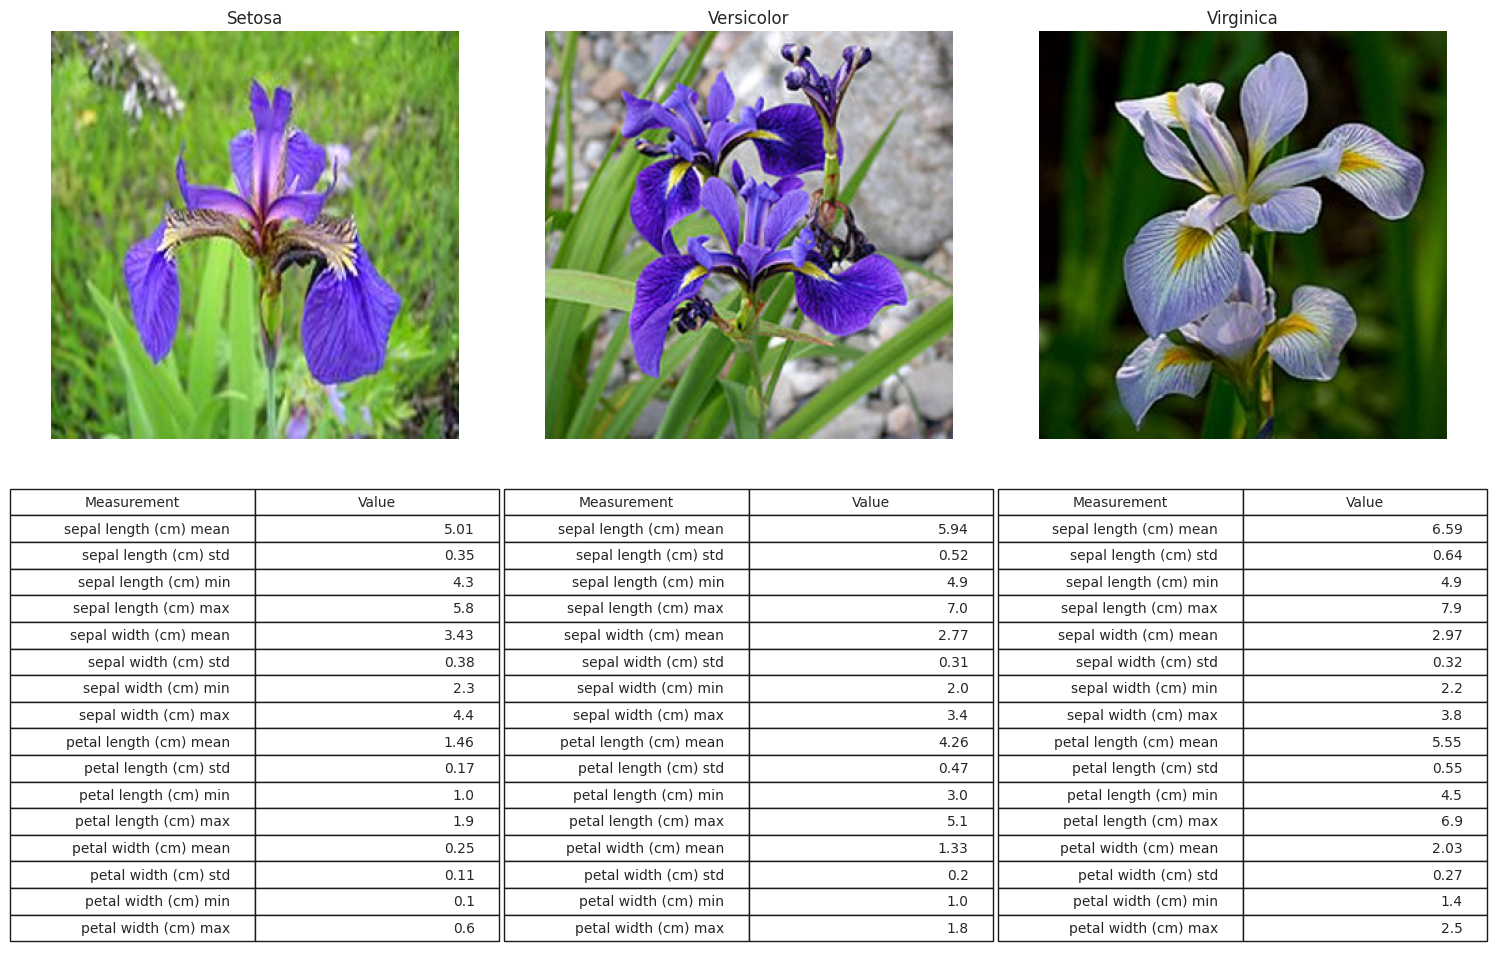

In [142]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust as needed

# Define the desired size
desired_size = (300, 300)

for i, species in enumerate(images.keys()):
    # Load and display image
    img = Image.open(images[species])
    # Resize image
    img = img.resize(desired_size)
    axs[0, i].imshow(img)
    axs[0, i].set_title(species)
    axs[0, i].axis('off')  # Turn off axis for images

    # Extract statistics for the current species
    species_stats = flower_stats[flower_stats['species'].str.lower() == species.lower()].iloc[0]
    species_data = species_stats.drop('species').reset_index()
    species_data.columns = ['Measurement', 'Value']

    # Create table
    table = axs[1, i].table(cellText=species_data.values, colLabels=species_data.columns, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # You may need to adjust this scale factor
    axs[1, i].axis('off')  # Turn off axis for table

plt.tight_layout()
plt.show()


## Visualizing the Data

It's important to visualize our data to understand the distribution of different features and the relationships between them.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# Example DataFrame with your statistics (replace with your actual DataFrame)
data = {
    'Statistic': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'Setosa': [50.0, 5.006, 0.352, 4.3, 4.8, 5.0, 5.2, 5.8],
    'Versicolor': [50.0, 5.936, 0.516, 4.9, 5.6, 5.9, 6.3, 7.0],
    'Virginica': [50.0, 6.588, 0.636, 4.9, 6.225, 6.5, 6.9, 7.9]
    # ... add other statistics
}
df = pd.DataFrame(data)

# Paths to your flower images
image_paths = {
    'Setosa': 'path_to_setosa_image.jpg',
    'Versicolor': 'path_to_versicolor_image.jpg',
    'Virginica': 'path_to_virginica_image.jpg'
}

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (species, path) in enumerate(image_paths.items()):
    # Load and display image
    img = Image.open(path)
    axs[i].imshow(img)
    axs[i].axis('off')  # Turn off axis

    # Display statistics next to the image
    stats = df[species].values
    stats_text = "\n".join([f"{stat}: {value}" for stat, value in zip(df['Statistic'], stats)])
    axs[i].text(img.width, 0.5, stats_text, verticalalignment='center')

    axs[i].set_title(species)

plt.tight_layout()
plt.show()


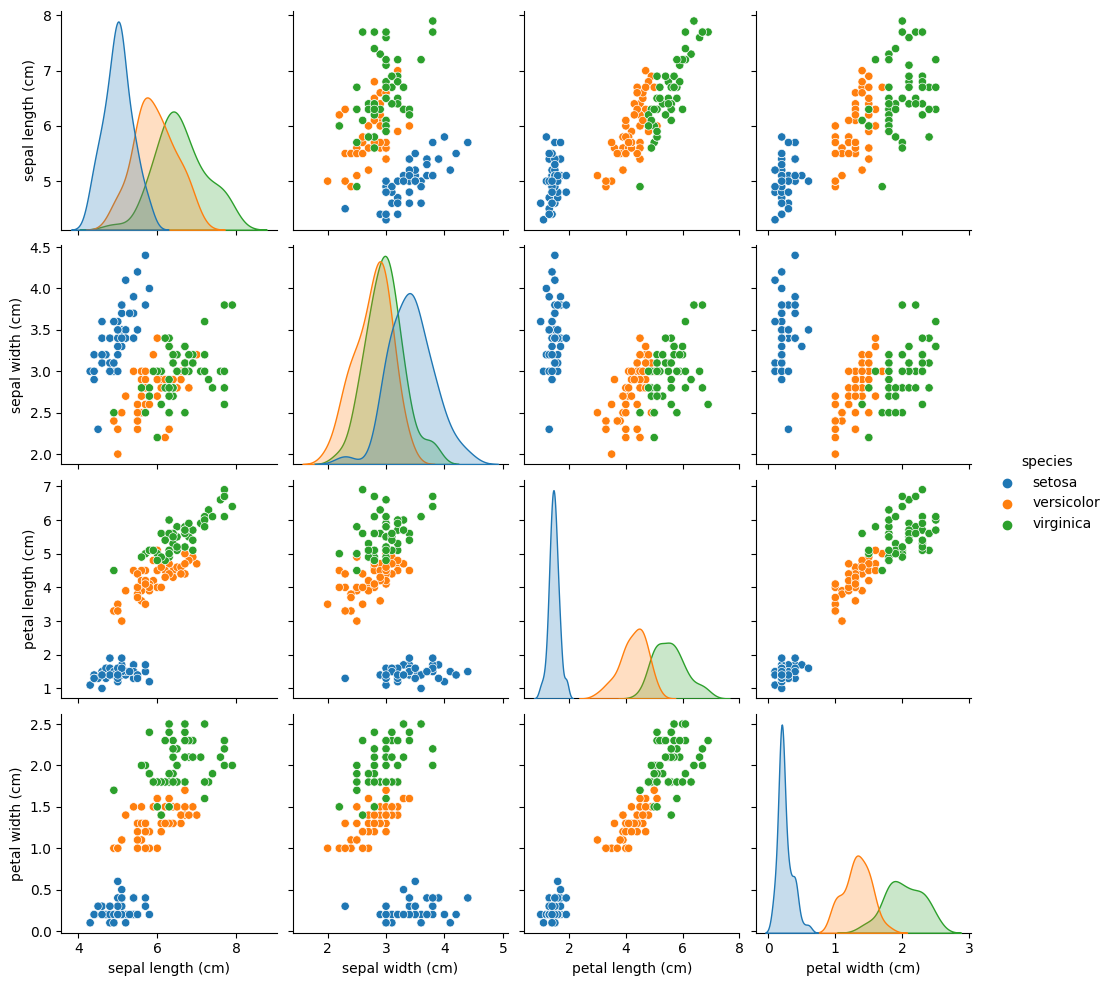

In [44]:
# Pairplot
sns.pairplot(iris_df, hue="species")
plt.show()

In [10]:
# Randomizing the data and creating training ans test datasets
np.random.seed(42) # randomize data
indices = np.random.permutation(len(iris_data))
n_training_samples = 12
trainset_data = iris_data[indices[:-n_training_samples]]
trainset_labels = iris_labels[indices[:-n_training_samples:]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]

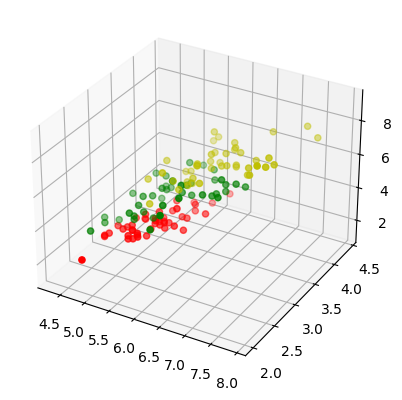

In [12]:
X = []
for iclass in range(3):
  X.append([[], [], []])
  for i in range(len(trainset_data)):
    if trainset_labels[i] == iclass:
      X[iclass][0].append(trainset_data[i][0])
      X[iclass][1].append(trainset_data[i][1])
      X[iclass][2].append(sum(trainset_data[i][2:]))

colours = ("r", "g", "y")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for iclass in range(3):
  ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])

plt.show()
# the different colours are for different species


The different colours in the graph above show different classes of the iris flowers. As we can see some of the points are overlapping meaning it may be difficult to predict the classes.We can see that mostly for classes in "red" and "green".:

## Model Building - KNN Algorithm

We'll build a K-Nearest Neighbors model to classify the Iris species based on the features provided.


In [13]:
# Let us build a function to get distance from point 1 and point 2
def distance(instance1, instance2):

  instance1 = np.array(instance1)
  instance2 = np.array(instance2)

  return np.linalg.norm(instance1 - instance2)

In [14]:
# build function to get closes neighbors

def get_neighbors(training_set,
                  labels,
                  test_instance,
                  k,
                  distance=distance):
  distances = []
  for index in range(len(training_set)):
    dist = distance(test_instance, training_set[index])
    distances.append((training_set[index], dist, labels[index]))
  distances.sort(key=lambda x:x[1])
  neighbors = distances[:k]
  return(neighbors)



In [18]:
# now let us create function to vote which class does the given point belong to
def vote(neighbors):
  class_counter = Counter()
  for neighbor in neighbors:
    class_counter[neighbor[2]] += 1
  return class_counter.most_common(1)[0][0]

In [25]:
# calling the function on several points to check how model performed


total_predictions=0
correct_predictions=0

for i in range(n_training_samples):

  neighbors = get_neighbors(trainset_data,
                           trainset_labels,
                           testset_data[i],
                           3,
                           distance=distance)

  predicted_label = vote(neighbors)
  actual_label = testset_labels[i]

  if predicted_label == actual_label:
    correct_predictions += 1

  total_predictions += 1

  print("index: ", i,
        ", result of vote: ", vote(neighbors),
        ", label: ", testset_labels[i],
        ", data: ", testset_data[i])

accuracy = correct_predictions/total_predictions

print(f"The model was able to predict {correct_predictions} correct predictions from the {total_predictions}. Hence the calculate accuracy is {round(accuracy*100,2)}%")

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]
The model was able to predict 11 correct predictions from the 12. Hence the calculate accuracy is 91.67%


# Evaluation model performance

In [52]:
# calling the function on several points to check how model performed


total_predictions=0
correct_predictions=0

test_results_df = pd.DataFrame(columns=["index", "voted_label", "actual_label", "data"])

for i in range(n_training_samples):


  neighbors = get_neighbors(trainset_data,
                           trainset_labels,
                           testset_data[i],
                           3,
                           distance=distance)

  predicted_label = vote(neighbors)
  actual_label = testset_labels[i]

  if predicted_label == actual_label:
    correct_predictions += 1

  total_predictions += 1

  # updating results in dataframe

  new_data = {'index': i,
              'voted_label': predicted_label,
              'actual_label': actual_label,
              'data': testset_data[i]}  # Replace with actual values

  test_results_df.loc[len(test_results_df)] = new_data

  print("index: ", i,
        ", result of vote: ", vote(neighbors),
        ", label: ", testset_labels[i],
        ", data: ", testset_data[i])

accuracy = correct_predictions/total_predictions

print(f"The model was able to predict {correct_predictions} correct predictions from the {total_predictions}. Hence the calculate accuracy is {round(accuracy*100,2)}%")

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]
The model was able to predict 11 correct predictions from the 12. Hence the calculate accuracy is 91.67%


In [149]:
# calling the function on several points to check how model performed


total_predictions=0
correct_predictions=0

test_results_df = pd.DataFrame(columns=["index", "voted_label", "actual_label", "data"])

for i in range(n_training_samples):


  neighbors = get_neighbors(trainset_data,
                           trainset_labels,
                           testset_data[i],
                           6,
                           distance=distance)

  predicted_label = vote(neighbors)
  actual_label = testset_labels[i]

  if predicted_label == actual_label:
    correct_predictions += 1

  total_predictions += 1

  # updating results in dataframe

  new_data = {'index': i,
              'voted_label': predicted_label,
              'actual_label': actual_label,
              'data': testset_data[i]}  # Replace with actual values

  test_results_df.loc[len(test_results_df)] = new_data

  print("index: ", i,
        ", result of vote: ", vote(neighbors),
        ", label: ", testset_labels[i],
        ", data: ", testset_data[i])

accuracy = correct_predictions/total_predictions

print(f"The model was able to predict {correct_predictions} correct predictions from the {total_predictions}. Hence the calculate accuracy is {round(accuracy*100,2)}%")

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]
The model was able to predict 11 correct predictions from the 12. Hence the calculate accuracy is 91.67%


In [63]:
test_results_df['predicted_correctly'] = test_results_df['voted_label'] == test_results_df['actual_label']
test_results_df['predicted_correctly'] = test_results_df['predicted_correctly'].astype(int)
test_results_df

,index,voted_label,actual_label,data,predicted_correctly
0,0,1,1,"[5.7, 2.8, 4.1, 1.3]",1
1,1,2,2,"[6.5, 3.0, 5.5, 1.8]",1
2,2,1,1,"[6.3, 2.3, 4.4, 1.3]",1
3,3,1,1,"[6.4, 2.9, 4.3, 1.3]",1
4,4,2,2,"[5.6, 2.8, 4.9, 2.0]",1
5,5,2,2,"[5.9, 3.0, 5.1, 1.8]",1
6,6,0,0,"[5.4, 3.4, 1.7, 0.2]",1
7,7,1,1,"[6.1, 2.8, 4.0, 1.3]",1
8,8,1,2,"[4.9, 2.5, 4.5, 1.7]",0
9,9,0,0,"[5.8, 4.0, 1.2, 0.2]",1


The model was able to predict 11 correct predictions from the 12. Hence the calculate accuracy is 91.67%


In [64]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = test_results_df['actual_label']
y_pred = test_results_df['voted_label']

# generating confusion matric
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix

array([[2, 0, 0],
       [0, 5, 0],
       [0, 1, 4]])

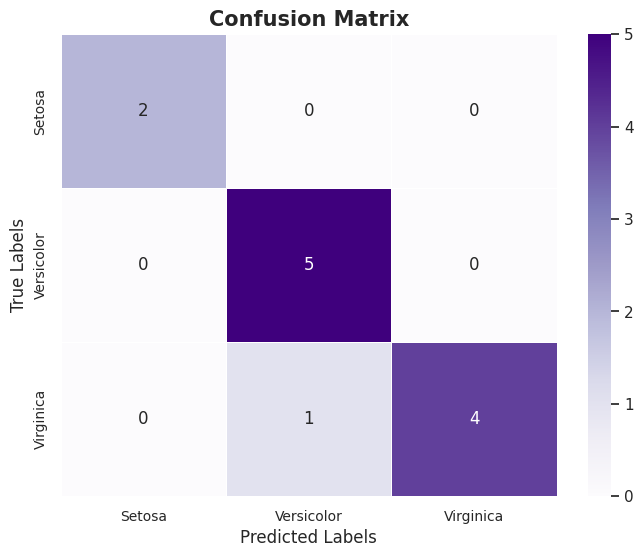

In [146]:
sns.set(style="whitegrid")  # Set style
plt.figure(figsize=(8, 6))  # Set figure size

# Create a heatmap
ax = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Purples', linewidths=.5)

plt.xlabel('Predicted Labels', fontsize=12)  # Set x-label
plt.ylabel('True Labels', fontsize=12)  # Set y-label
plt.title('Confusion Matrix', fontsize=15, fontweight='bold')  # Set title

# Improve aesthetics
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

class_names = ['Setosa', 'Versicolor', 'Virginica']
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.show()

In [65]:
# generating classification report
class_report = classification_report(y_true, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12



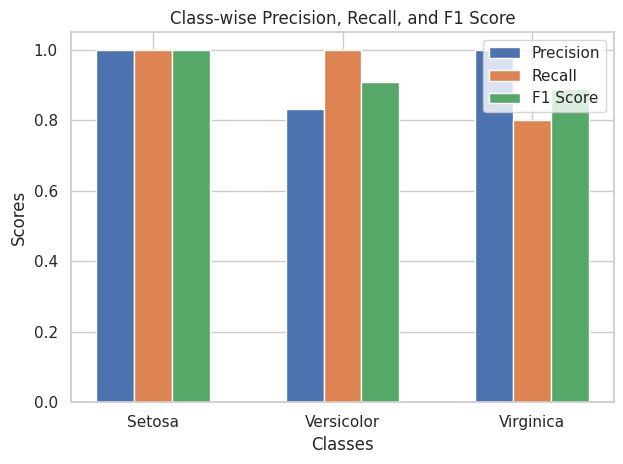

In [72]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

# Creating a bar chart
classes = np.unique(y_true)
x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars

class_names = ['Setosa', 'Versicolor', 'Virginica']


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1 Score')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Class-wise Precision, Recall, and F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

fig.tight_layout()

plt.show()

## Model Analysis Summary:

* Setosa (Class 0)

  * Precision (1.00): The model is 100% precise in predicting Setosa, meaning every instance it labeled as Setosa was correct.
  * Recall (1.00): The model identified 100% of the Setosa instances in the dataset. No Setosa flower was misclassified as another species.
  * F1-Score (1.00): The perfect F1 score indicates an excellent balance between precision and recall.
  * Support (2): There were 2 instances of Setosa in the dataset.

* Versicolor (Class 1)

  * Precision (0.83): When the model predicts an instance as Versicolor, it's correct about 83% of the time. This suggests some Versicolor instances might be misclassified.
  * Recall (1.00): The model successfully identified all Versicolor instances, although some instances of other classes might have been incorrectly labeled as Versicolor.
  * F1-Score (0.91): A high F1 score suggests a good balance between precision and recall, but slightly weighted towards recall.
  * Support (5): There were 5 instances of Versicolor in the dataset.
  
* Virginica (Class 2)

  * Precision (1.00): The model is highly precise in predicting Virginica. All predictions of Virginica were correct.
  * Recall (0.80): The model identified 80% of the actual Virginica instances. This means 20% of Virginica instances were likely misclassified as another species.
  * F1-Score (0.89): The F1 score is high, but lower than Setosa, indicating a slight issue with recall.
  * Support (5): There were 5 instances of Virginica in the dataset.

* Overall Performance

  * Accuracy (0.92): The model correctly predicted the species for 92% of the flowers across all species. This is a high accuracy rate.
  * Macro Average (Precision 0.94, Recall 0.93, F1-Score 0.93): These averages suggest that the model performs consistently across all classes without bias towards any particular class.
  * Weighted Average (Precision 0.93, Recall 0.92, F1-Score 0.92): Given that the dataset is slightly imbalanced (not an equal number of instances for each species), these weighted averages are a more accurate representation of model performance.

## Insights and Recommendations:

  * The model is exceptionally good at identifying Setosa with perfect scores across all metrics.
  * Performance on Versicolor is also strong, particularly in recall, but there is some room for improvement in precision.
  * The model struggles slightly with identifying Virginica, primarily in recall, suggesting that some Virginica flowers are being misclassified.
  * Since the dataset is small (only 12 instances in total), it would be beneficial to test the model on a larger dataset for more reliable insights.
  Additional model tuning might be necessary to improve precision for Versicolor and recall for Virginica.